# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [1]:
# Standard library
import sys

import numpy as np
import matplotlib.pyplot as plt

import metpy 

We want MetPy ver 1.6.1

In [2]:
# !pip install metpy --upgrade

In [3]:
print(f" Harnessing the power of MetPy version {metpy.__version__} ️")

 Harnessing the power of MetPy version 1.6.1 ️


In [4]:
sys.path.insert(1, '../sealsml')

# Azimuth Testing

In [5]:
from geometry import GeoCalculator

In [6]:
# x, y, and z

ref = np.array([[0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.]])

target = np.array([[0., 1., 0.], # north, 0
                   [1., 0., 0.],
                   [0., -1., 0.],
                   [-1., 0., 0.]])

In [7]:
geometry_class = GeoCalculator(ref, target)
geometry_class.calculate_azimuth()

Warning, Azimuth Calculation might be wrong for vertically offset points


array([  0.,  90., 180., 270.])

# Random u and v data

In [8]:
# Set the number of examples
num_examples = 100

# Generate random u and v components using a normal distribution with mean 0 and standard deviation 5
u_data = np.random.normal(loc=0, scale=5, size=num_examples)
v_data = np.random.normal(loc=0, scale=5, size=num_examples)

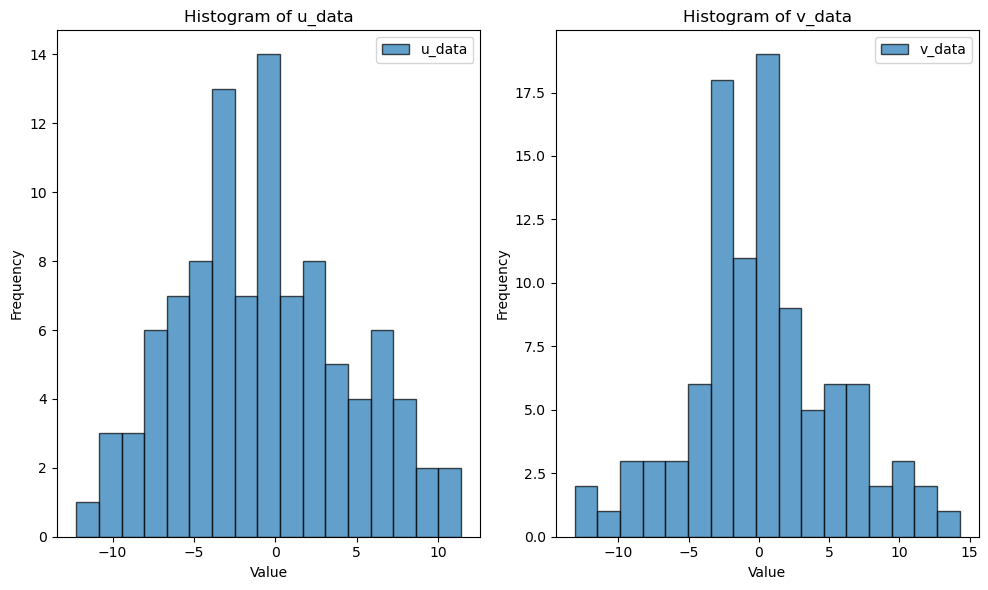

In [9]:
n_bins = 17

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the histograms
ax1.hist(u_data, bins=n_bins, edgecolor='black', alpha=0.7, label='u_data')
ax2.hist(v_data, bins=n_bins, edgecolor='black', alpha=0.7, label='v_data')

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of u_data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of v_data')

# Add legend
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Let's show how to use MetPy Calc

In [10]:
from metpy.calc import wind_direction
from metpy.calc import wind_speed

from metpy.units import units

In [11]:
wind_dir = wind_direction(u_data*units("m/s"), v_data*units("m/s"))

windspeed = wind_speed(u_data*units("m/s"), v_data*units("m/s"))

# lets try to find Ch4 max, first lets make an array of random ch4 data

In [12]:
# Define number of data points
N = 5000

# Generate random frequencies and amplitudes for sin and cos
freq_sin = np.random.uniform(0.1, 0.5)
amp_sin = np.random.uniform(0.5, 1.5)
freq_cos = np.random.uniform(0.2, 0.8)
amp_cos = np.random.uniform(0.5, 1.5)

# Generate time series data as a 1D array
t = np.linspace(0, 20, N)
data = amp_sin * np.sin(freq_sin * t) + amp_cos * np.cos(freq_cos * t) + np.random.randn(N) * 0.05


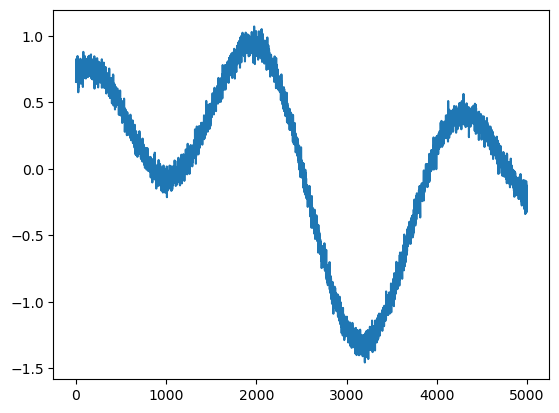

In [13]:
plt.plot(data)

In [14]:
from backtrack import findmaxCH4

In [15]:
%%time
max_c_noloop, time_max_c_noloop, ijk_max_noloop = findmaxCH4(data, t)

CPU times: user 55 µs, sys: 157 µs, total: 212 µs
Wall time: 31.9 µs


#### findmaxCH4 has been tested by Bryan, seems to work as intended

# Backtrack Function Testing

In [16]:
from backtrack import backtrack

## These variables are all made up. Just looking to see what it requires and see if it runs. 

In [17]:
sensor_x = 1
sensor_y = 2

pathmax = 3.2
dt = 1

ijk_start = 2

u_sonic = u_data
v_sonic = v_data

In [18]:
np.size(ijk_start)

1

In [19]:
%%time
backtrack(ijk_start, u_sonic, v_sonic, dt, sensor_x, sensor_y, pathmax)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 39.3 µs


(-0.25986544250937493, -0.9869836017519911)